<a href="https://colab.research.google.com/github/MohammadUsman0/Deep-learning-models/blob/main/Generative_Adversarial_Networks_(GAN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative Adversarial Networks (GAN)
GANs are composed of two components, a generator and a discriminator. The discriminator has the task of determining whether a given image looks natural (ie, is an image from the dataset) or looks like it has been artificially created. The task of the generator is to create natural looking images that are similar to the original data distribution, images that look natural enough to fool the discriminator network.

Here is an implementation of simple GAN model for generating digits like in MNIST dataset.

##  Import libraries and modules

In [1]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import *
from keras.models import *
from keras.optimizers import *
import matplotlib.pyplot as plt
import sys
import numpy as np

## Define model architecture

In [ ]:
def Generator():
    model = Sequential()
    model.add(Dense(128 * 7 * 7, activation="relu", input_dim=latent_dim))
    model.add(Reshape((7, 7, 128)))
    model.add(UpSampling2D())
    model.add(Conv2D(128, kernel_size=3, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(UpSampling2D())
    model.add(Conv2D(64, kernel_size=3, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(Conv2D(channels, kernel_size=3, padding="same"))
    model.add(Activation("tanh"))
    model.summary()
    noise = Input(shape=(latent_dim,))
    img = model(noise)
    return Model(noise, img)

def Discriminator():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=img_shape, padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    model.add(ZeroPadding2D(padding=((0,1),(0,1))))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    img = Input(shape=img_shape)
    validity = model(img)
    return Model(img, validity)
   

## Complie GAN model

In [2]:
# Build and compile the discriminator
D = Discriminator()
D.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Build the generator
G = Generator()

# The generator takes noise as input and generates imgs
z = Input(shape=(latent_dim,))
img = G(z)

# For the combined model we will only train the generator
D.trainable = False

# The discriminator takes generated images as input and determines validity
valid = D(img)

# The combined model  (stacked generator and discriminator)
# Trains the generator to fool the discriminator
combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 64)          256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 64)          0

## Load MNIST data and train GAN

In [6]:
# Input shape
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)
latent_dim = 100

optimizer = Adam(0.0002, 0.5)

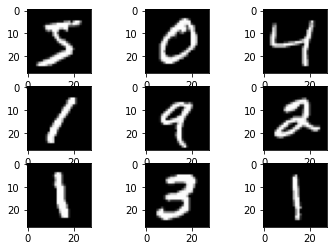

In [8]:
# Load the dataset
(X_train, _), (_, _) = mnist.load_data()

#plot some images from training data
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

# Rescale -1 to 1
X_train = X_train / 127.5 - 1.
X_train = X_train.reshape(-1, img_rows, img_cols, channels )

11493376/11490434 [==============================] - 0s 0us/step
 [Epoch: 0/10][Batch: 467/468] [D loss: 0.182, acc.: 97.27% ] [G loss: 0.896]

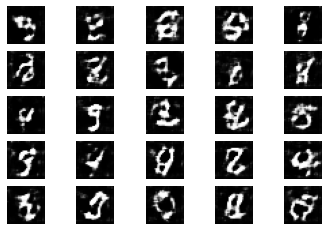

 [Epoch: 1/10][Batch: 467/468] [D loss: 0.021, acc.: 100.00% ] [G loss: 0.042]

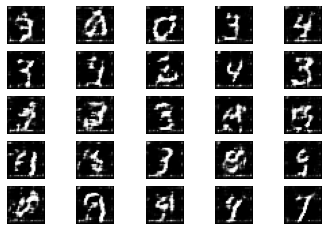

 [Epoch: 2/10][Batch: 467/468] [D loss: 0.000, acc.: 100.00% ] [G loss: 0.267]

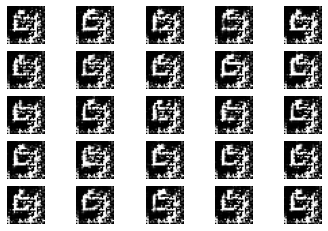

 [Epoch: 3/10][Batch: 467/468] [D loss: 0.000, acc.: 100.00% ] [G loss: 0.193]

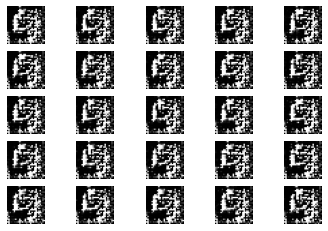

 [Epoch: 4/10][Batch: 467/468] [D loss: 0.000, acc.: 100.00% ] [G loss: 0.844]

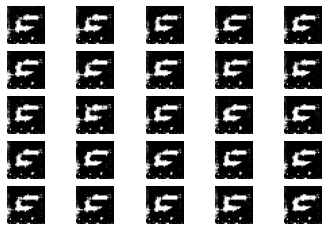

 [Epoch: 5/10][Batch: 467/468] [D loss: 0.000, acc.: 100.00% ] [G loss: 0.304]

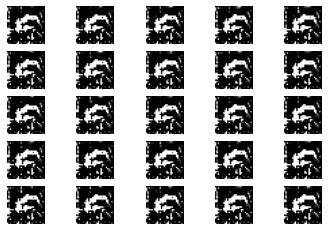

 [Epoch: 6/10][Batch: 467/468] [D loss: 0.000, acc.: 100.00% ] [G loss: 0.748]

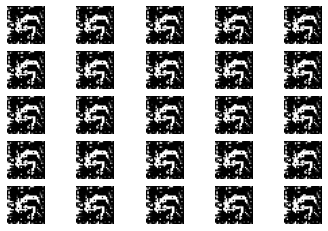

 [Epoch: 7/10][Batch: 467/468] [D loss: 0.000, acc.: 100.00% ] [G loss: 0.374]

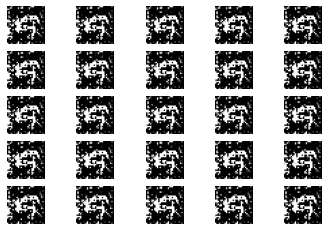

 [Epoch: 8/10][Batch: 467/468] [D loss: 0.000, acc.: 100.00% ] [G loss: 0.256]

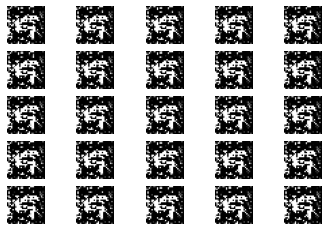

 [Epoch: 9/10][Batch: 467/468] [D loss: 0.000, acc.: 100.00% ] [G loss: 0.177]

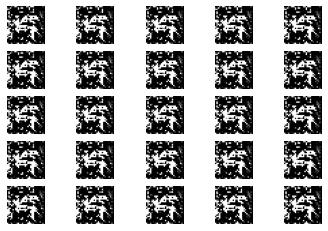

In [3]:
epochs = 10
batch_size = 128
count_images = X_train.shape[0]
batches = int(count_images/batch_size)

# Adversarial ground truths
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
    for batch in range(batches):
        # Select a random half of images
        imgs = X_train[batch*batch_size:(batch+1)*batch_size]
        

        # Sample noise and generate a batch of new images
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_imgs = G.predict(noise)

        # Train the discriminator (real classified as ones and generated as zeros)
        d_loss_real = D.train_on_batch(imgs, valid)
        d_loss_fake = D.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
         #  Train Generator
        # ---------------------

        # Train the generator (wants discriminator to mistake images as real)
        g_loss = combined.train_on_batch(noise, valid)

        # Print the progress
        sys.stdout.write("\r [Epoch: {0}/{1}][Batch: {2}/{3}] [D loss: {4:.3f}, acc.: {5:.2f}% ] [G loss: {6:.3f}]".format(epoch,
                        epochs, batch,batches, d_loss[0], 100*d_loss[1], g_loss))
        
    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5
    
    r, c = 5,5
    # Plot Generated Images 
    fig, axs = plt.subplots(r, c)
    img_count = 0
    for i in range(r):
      for j in range(c):
        axs[i,j].imshow(gen_imgs[img_count, :,:,0], cmap='gray')
        axs[i,j].axis('off')
        img_count += 1
    plt.show()
    plt.close()    
